___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [4]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 10 farklı sınıf. 32x32 lik resimler. Gerçek dünyada bu kadar küçük resimler yok

# Computer vision da karşılaşılan problemler
# Bunlar sıkıntılı resimler. Genelde image processingte karşılaşılan en büyük problem arkaplanın dağınıklığı
# .. Duvarın önündeki fotoğraf ile arkada başka şeyler olan fotoğrafın tanınması daha farklı oluyor
# Mesela yüz tanımada "yüz" kaç derece dönerse yüzü tanıyabilirsiniz(rotation)
# .. ağzında atkı olması, gözlük olması gibi engeller oluşabiliyor
# Diğer bir problem aydınlatma. Bi yerden yüze gölge düşüyorsa tanımak sıkıntı olabiliyor
# Resulation: scaling le alakalı
# 3. ders

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")
# Rakamların genelde 10000 den yüksek olmasını isteriz. Yoksa iyi öğrenemiyor

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[5].shape # 3 channel lı

(32, 32, 3)

In [7]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

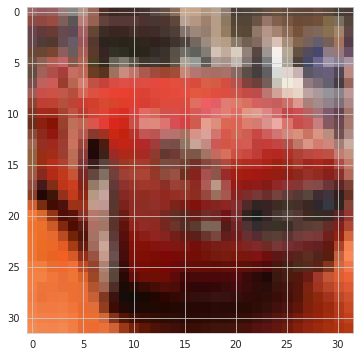

In [8]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [9]:
y_train[5]   # örneğin y_train[5] 1. indexteki class a eşitmiş(Automobile)(Alttaki class names e bkz)

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # Her class a numaralar verilmiş.

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# Bu class ı anlamlandırırken kullanacağız ilerde. Bu yüzden liste oluşturduk.

In [14]:
y_train[0]  # 6 --> Yani frog. Frog u çıktı olarak istersek;

array([6], dtype=uint8)

In [15]:
classes[y_train[0][0]]  # I. yol

'frog'

In [16]:
classes[int(y_train[0])] # II. yol

'frog'

In [17]:
#int(np.random.randint(low=0, high=50000, size=1))

In [18]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

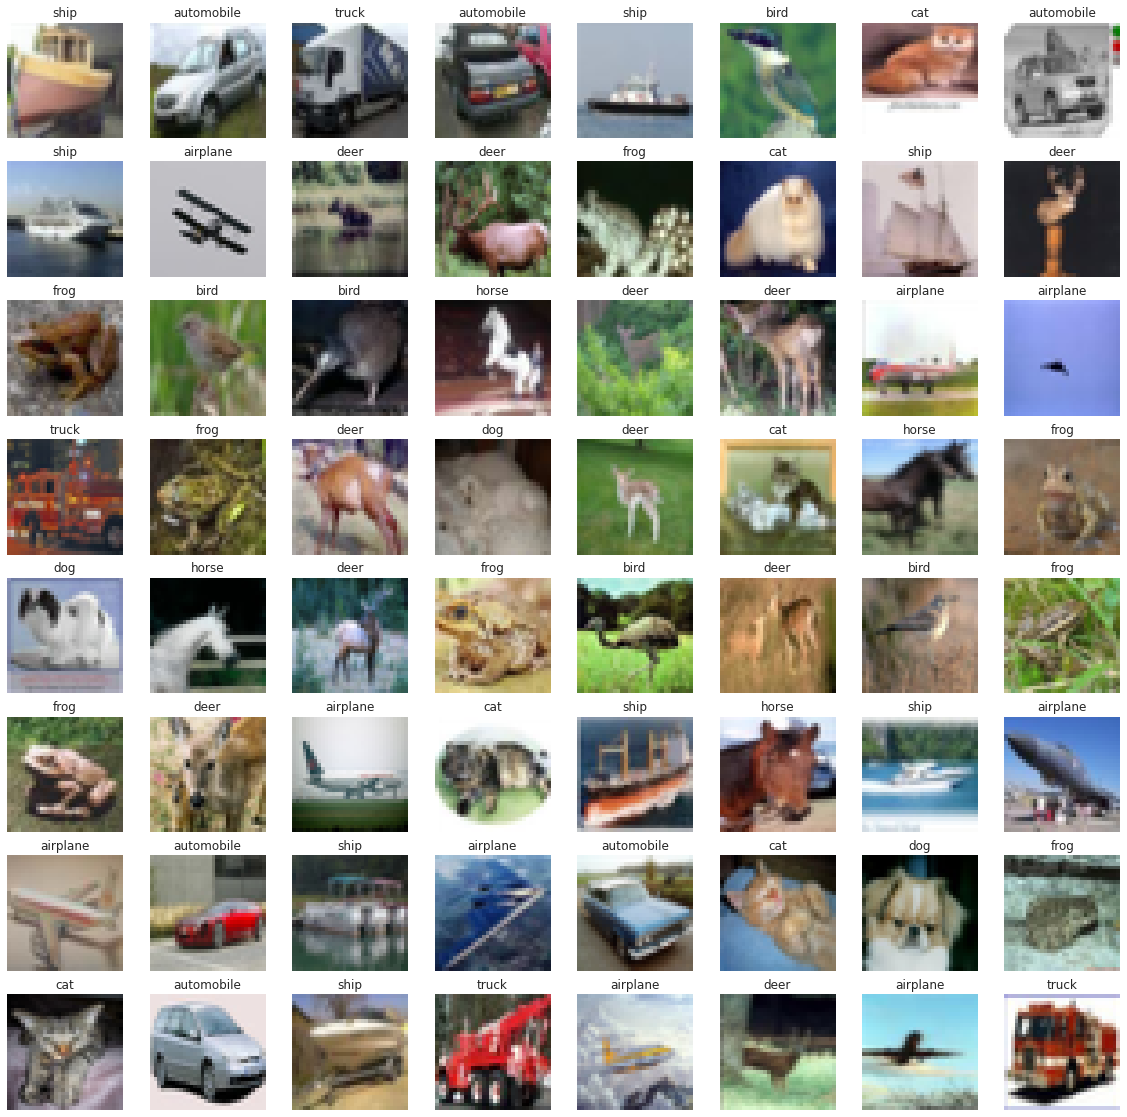

In [19]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Train datasından random 64 tane resim göstersin bize
# Background ciddi bir problemdir demiştik. Öğrenebilen filtreler köpeği oradan çıkartıyor
# .. eğer öğrenebilen filtreler kullanmazsanız, "background subjection" vs yapmanız gerekiyor
# .. ama bizim için CNN bunu yapıyor 

# Data Preprocessing

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()
# Scaling yapmaya ihtiyaç var mı diye herhangi bir dataya bakıyoruz.
# NOT: 252 ye bölersek hata yaparız.

252

In [22]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

0.9882353

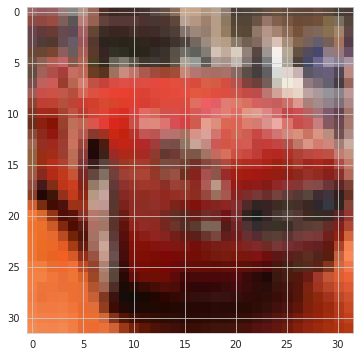

In [25]:
plt.imshow(X_train[5])

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [30]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [147]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
# kernel_size = (3,3) ideal bu data için
# padding='same' : Bunu "valid" de yapabiliriz. Çok büyük bir kayıp değil. Çünkü objelerimiz resmin
# .. ortasında olduğu için üstten ve yandan 1 piksellik kayıp çok sorun değil.
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
# class chat soru: Hocam 2.conv. layer da filter sayısını 32 den küçük almak daha uygun değil midir?(Hoca da burada 48 yazıyordu)
# John H: Önce büyük yapıp sonra küçültmek daha iyi. Ancak biz overfitting i göstermek için böyle yaptık
model.add(Flatten())
model.add(Dense(128, activation='relu')) # İlk nöronu mümkün olduğu kadar büyük tutuyoruz
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
model.summary()
# 281,322 tane katsayıyı öğrenmesi gerekiyor(Bunların büyük çoğunluğu ANN kısmındaki katsayılar)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [149]:
from tensorflow.keras.callbacks import EarlyStopping

In [150]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [151]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4352 - accuracy: 0.4791 - val_loss: 1.2377 - val_accuracy: 0.5479
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0606 - accuracy: 0.6255 - val_loss: 1.0136 - val_accuracy: 0.6383
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9131 - accuracy: 0.6800 - val_loss: 0.9699 - val_accuracy: 0.6628
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8156 - accuracy: 0.7125 - val_loss: 0.9372 - val_accuracy: 0.6706
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7391 - accuracy: 0.7391 - val_loss: 0.8804 - val_accuracy: 0.6997
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6744 - accuracy: 0.7607 - val_loss: 0.9351 - val_accuracy: 0.6811
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6118 - accuracy: 0.7835 - val_loss: 0.9165 - val_accuracy:

In [152]:
model.metrics_names

['loss', 'accuracy']

In [153]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.435,0.479,1.238,0.548
1,1.061,0.626,1.014,0.638
2,0.913,0.680,0.970,0.663
3,0.816,0.712,0.937,0.671
4,0.739,0.739,0.880,0.700


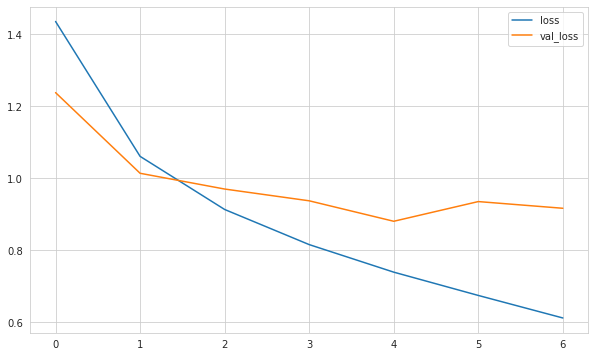

In [154]:
summary[["loss", "val_loss"]].plot();

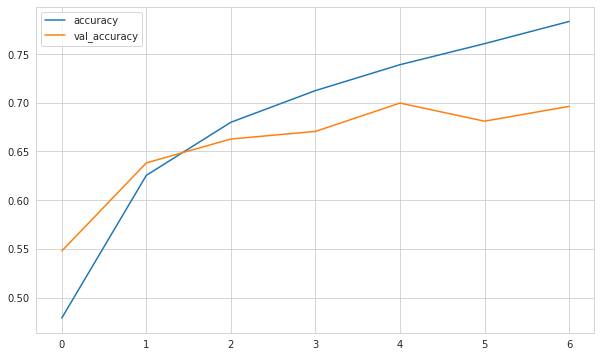

In [155]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [156]:
from sklearn.metrics import classification_report, confusion_matrix

In [157]:
model.evaluate(X_test, Y_test) # loss: 0.8987 - accuracy: 0.6942

313/313 [==============================] - 1s 3ms/step - loss: 0.8804 - accuracy: 0.6997


[0.8803605437278748, 0.6996999979019165]

In [158]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])     # 0.8986572027206421
print('Test accuracy:', score[1]) # 0.6941999793052673

Test loss: 0.8803605437278748
Test accuracy: 0.6996999979019165


In [159]:
pred_prob = model.predict(X_test)

In [160]:
y_pred = np.argmax(pred_prob, axis=1)

In [161]:
y_pred  # ilk array de "5" maksimum, ikinci array de "8" ...

array([5, 8, 8, ..., 5, 1, 7])

In [162]:
print(classification_report(y_test, y_pred))

# Class chat soru: Burada herhangi bir sınıfın recall değerini maksimize ettirebiliyor muyuz?
# John H : Literatüre bakmak lazım. CNN in çalışma sistemi farklı. Daha sonra cevap verelim.

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.78      0.84      0.81      1000
           2       0.58      0.58      0.58      1000
           3       0.55      0.47      0.51      1000
           4       0.63      0.65      0.64      1000
           5       0.62      0.58      0.60      1000
           6       0.73      0.80      0.76      1000
           7       0.75      0.76      0.75      1000
           8       0.78      0.83      0.80      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [106]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [107]:
print(confusion_matrix(y_test, y_pred)) 
# Gerçekte 0 olan sınıftan 802 tanesini 0 olarak tahmin etmiş, 17 tanesini 1 olarak tahmin etmiş... vs 
# Gerçekte 3 olan sınıftan 455 tanesini 3 olarak tahmin etmiş, 25 tanesini 0 olarak tahmin etmiş... vs

[[802  21  18  22  14  15   5   6  44  53]
 [ 17 815  11  11   3   3   7   3  16 114]
 [ 93   7 568  56  76  96  44  30  10  20]
 [ 25  11  61 455  60 294  39  25  12  18]
 [ 36   6  82  46 607  96  42  71   9   5]
 [ 15   4  47 107  30 733  19  27   8  10]
 [ 10   3  63  94  50  50 707   6  11   6]
 [ 22   3  28  43  34 116   7 725   2  20]
 [108  62  13  12   5  25   1   3 720  51]
 [ 33  79   4  21   1  13   3  17  19 810]]


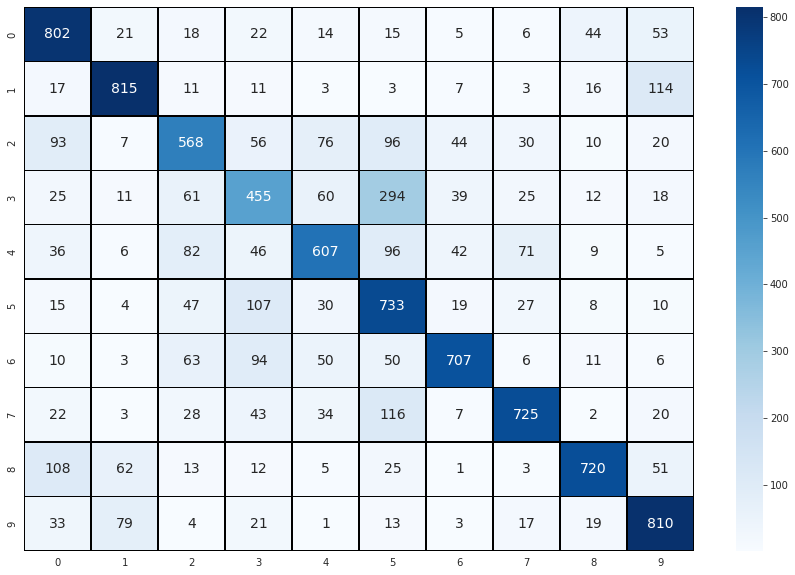

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-2

In [109]:
# Biraz daha komplex bir model kuralım
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# class chat soru: Bu durumda conv layer eklemek daha iyi öğrenme sağlıyor diyebilir miyiz?
# John H : Ondan ziyade Dropoutlardan kaynaklandı bu. Ama denenebilir(Model complexity yi arttırarak denedi
# .. hoca ve overfit e gitti)

In [110]:
model.summary()
# Parametre sayımızı 281000 den 905098 e çıktı(Öğrenmesi gereken parametre sayısı)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

In [111]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4324 - accuracy: 0.4796 - val_loss: 1.1862 - val_accuracy: 0.5909
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0179 - accuracy: 0.6401 - val_loss: 0.9386 - val_accuracy: 0.6670
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8831 - accuracy: 0.6891 - val_loss: 0.8439 - val_accuracy: 0.7071
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8011 - accuracy: 0.7190 - val_loss: 0.7856 - val_accuracy: 0.7276
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7417 - accuracy: 0.7398 - val_loss: 0.7505 - val_accuracy: 0.7433
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6953 - accuracy: 0.7550 - val_loss: 0.7136 - val_accuracy: 0.7534
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6597 - accuracy: 0.7687 - val_loss: 0.7091 - val_accu

In [112]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.432,0.480,1.186,0.591
1,1.018,0.640,0.939,0.667
2,0.883,0.689,0.844,0.707
3,0.801,0.719,0.786,0.728
4,0.742,0.740,0.751,0.743


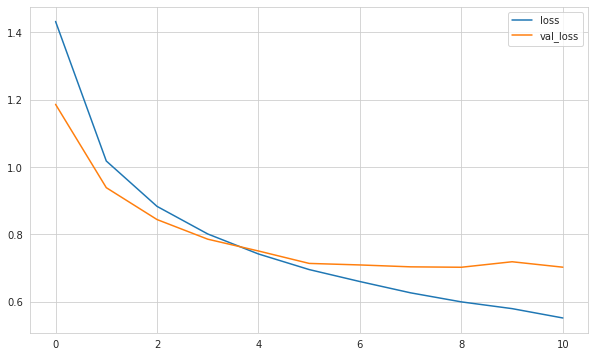

In [113]:
summary[["loss", "val_loss"]].plot();

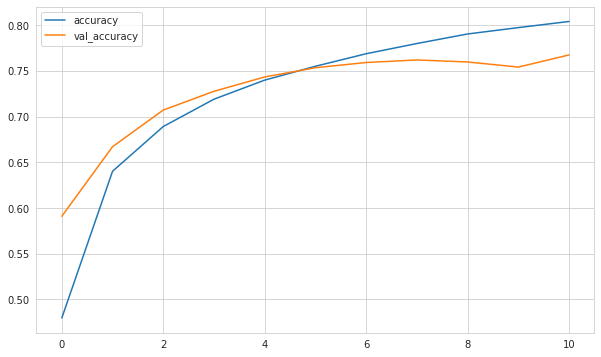

In [114]:
summary[["accuracy", "val_accuracy"]].plot();
# Model-2 de overfitting azalmış model-1 e göre. Yani bu modelin daha iyi çalıştığını söyleyebiliriz

# Evaluation on Test Data

In [115]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7022 - accuracy: 0.7597


[0.7022131085395813, 0.7597000002861023]

In [116]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7022131085395813
Test accuracy: 0.7597000002861023


In [117]:
pred_prob = model.predict(X_test)

In [118]:
y_pred = np.argmax(pred_prob, axis=1)

In [119]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.87      0.88      0.87      1000
           2       0.64      0.67      0.66      1000
           3       0.55      0.58      0.56      1000
           4       0.74      0.74      0.74      1000
           5       0.66      0.64      0.65      1000
           6       0.84      0.80      0.82      1000
           7       0.88      0.72      0.79      1000
           8       0.83      0.88      0.85      1000
           9       0.85      0.86      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



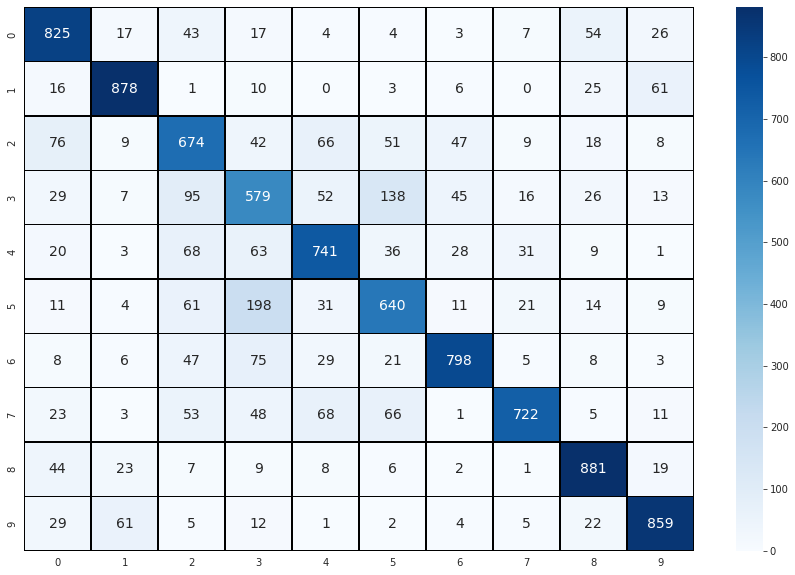

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [122]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [123]:
from tensorflow.keras.layers import BatchNormalization
# ANN de de kullanılabiliyor ama ANN de overfitting durumu ile çok karşılaşmamıştık
# CNN de overfitting daha olası olduğu için BatchNormalization konusuna bakacağız burada
# Bu yöntem dropouttan daha çok tercih ediliyor

# Bunu da araya katman gibi girer
# Layerın çıktılarını normalization yapar. (X-Mu)/sigma. Bundan sonra
# Bir de gama ve beta ile daha öğrenebilir hale getiriyoruz. Bu çıkışı normalize edip bir sonraki layerı 
# .. daha iyi beslemeyi sağlıyor.
# gama ve beta : Bu parametreleri biz öğreniyor()

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [124]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# class chat soru: Bazı katmanlarda batchNorm. , bazı katmanlardan sonra da dropout kullanılmasının bir sebebi var mıdır?
# John H: özel bir sebebi yok. Deneme yanılma yapıyoruz. dropout lar kaldırılıp denenebilir
# Hoca convoloutional neural networkde dropout kullanılmaması gerektiği ile alakalı
# .. bir makale gösterdi --> https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html

In [125]:
model.summary()
# 1,316,970 
# Non-trainable params: 2,304 : öğrenilemeyen parametreler. Gama ve beta değil, diğer 2 parametre

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [126]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.9526 - accuracy: 0.3007 - val_loss: 1.6187 - val_accuracy: 0.3955
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4383 - accuracy: 0.4809 - val_loss: 1.3164 - val_accuracy: 0.5336
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2197 - accuracy: 0.5799 - val_loss: 1.3205 - val_accuracy: 0.5436
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0974 - accuracy: 0.6257 - val_loss: 0.9406 - val_accuracy: 0.6745
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9964 - accuracy: 0.6653 - val_loss: 0.7810 - val_accuracy: 0.7309
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9280 - accuracy: 0.6933 - val_loss: 0.7160 - val_accuracy: 0.7547
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8697 - accuracy: 0.7155 - val_loss: 0.6881 - 

In [127]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.953,0.301,1.619,0.396
1,1.438,0.481,1.316,0.534
2,1.220,0.580,1.321,0.544
3,1.097,0.626,0.941,0.674
4,0.996,0.665,0.781,0.731


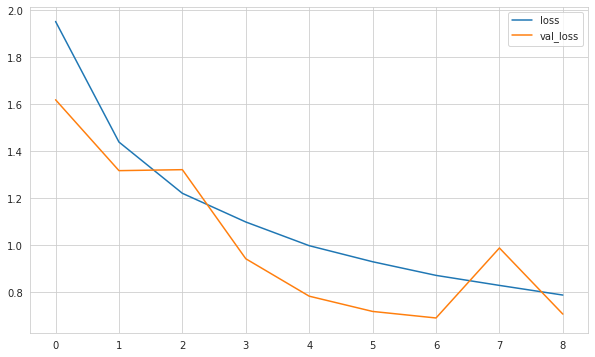

In [128]:
summary[["loss", "val_loss"]].plot();

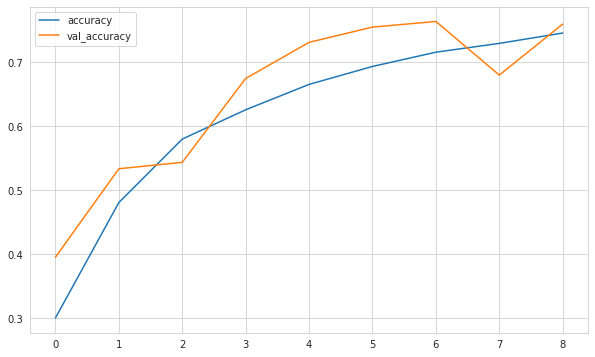

In [129]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [130]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.6881 - accuracy: 0.7635


[0.688103973865509, 0.7634999752044678]

In [131]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.688103973865509
Test accuracy: 0.7634999752044678


In [132]:
pred_prob = model.predict(X_test)

In [133]:
y_pred = np.argmax(pred_prob, axis=1)

In [134]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1000
           1       0.86      0.93      0.89      1000
           2       0.73      0.55      0.63      1000
           3       0.57      0.60      0.59      1000
           4       0.71      0.75      0.73      1000
           5       0.69      0.66      0.67      1000
           6       0.73      0.89      0.80      1000
           7       0.83      0.80      0.82      1000
           8       0.83      0.90      0.86      1000
           9       0.82      0.89      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



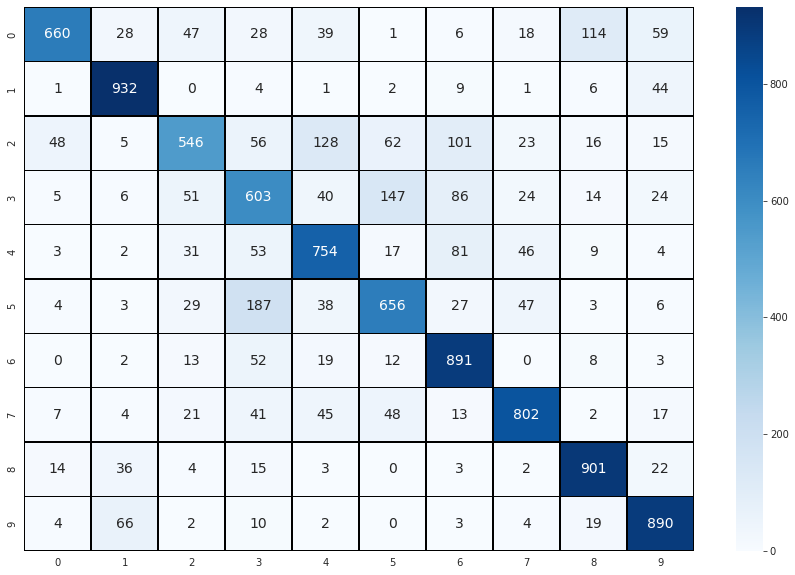

In [136]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [137]:
my_image = X_test[44]

In [138]:
my_image.shape

(32, 32, 3)

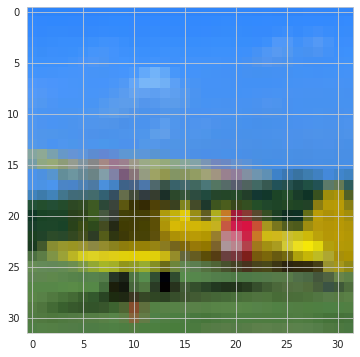

In [139]:
plt.imshow(my_image)

In [140]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [141]:
image_prediction

array([[9.6499491e-01, 1.3486779e-03, 2.6379891e-03, 4.4901963e-04,
        2.6244626e-03, 1.0191307e-04, 1.3604469e-04, 1.6310058e-03,
        9.7286068e-03, 1.6347392e-02]], dtype=float32)

In [142]:
np.argmax(image_prediction, axis=1)

array([0])

In [143]:
result=np.argmax(image_prediction, axis=1)

In [144]:
result

array([0])

In [145]:
classes[int(result)]

'airplane'

In [146]:
#model.save("cnn-1.h5")

#### Finished

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[15].shape

In [ ]:
np.expand_dims(X_test[15],axis=0).shape

In [ ]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [ ]:
np.argmax(pred)

In [ ]:
plt.imshow(X_test[15])

In [ ]:
classes[8]